<a href="https://colab.research.google.com/github/sirilak1606/MikkiPastel/blob/main/text_summarization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ขั้นตอนการทำ Text summarization (การสรุปบทความ)

1. นำเข้าข้อมูล (get data)
2. ตัดคำ (word tokenization)
3. นับความถี่ของคำ (word frequencies)
4. ทำการ normalize ความถี่ของคำที่ได้ (normalize word frequencies)
5. ตัดประโยค (sentence tokenization)
6. คำนวนคะเเนนของประโยคที่ตัดได้ (calculate sentence scores)
7. สร้างบทความในการสรุปจากคะเนนของประโยคที่คำนวณได้ (Create summarization by sentence scores)

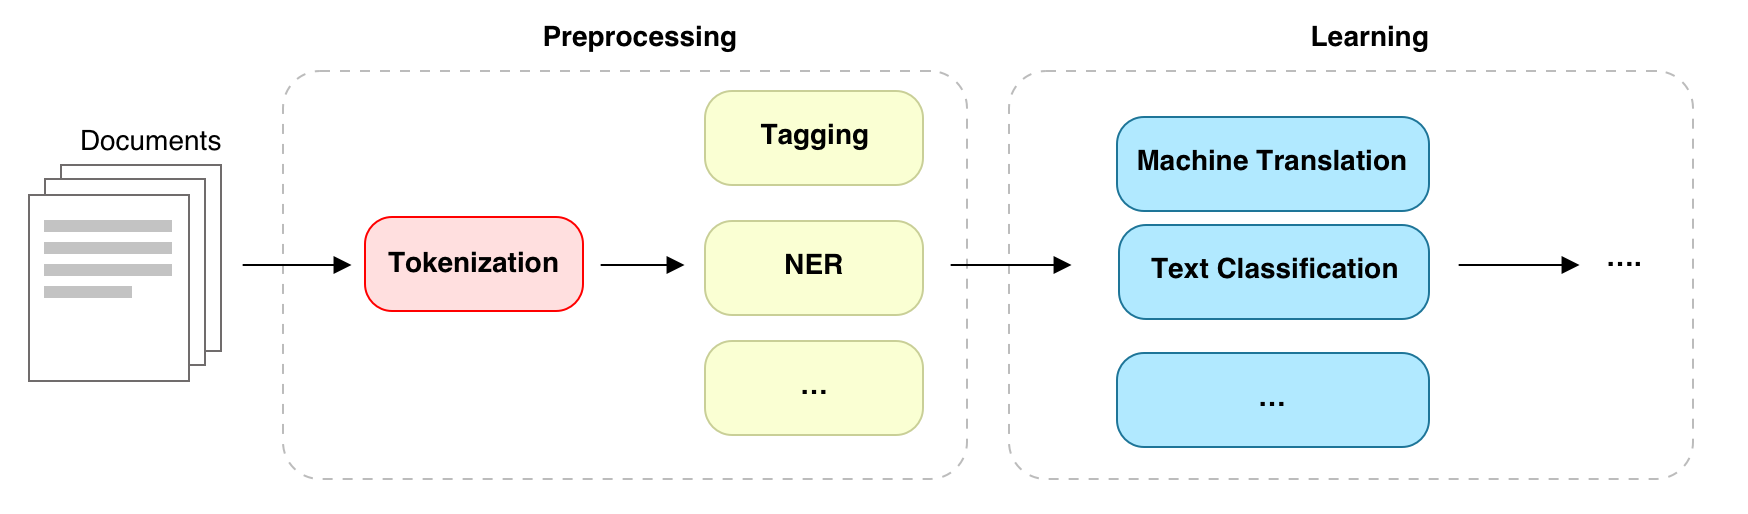

## นำเข้าเเละติดตั้งไลบรารีที่สำคัญในการสรุปบทความ

In [ ]:
!pip install pythainlp # "PyThaiNLP คือไลบรารี Python สำหรับงานด้านการประมวลผลข้อมูลภาษาไทย พัฒนาขึ้นมาโดยคนไทย มีฟังก์ชันที่มีประโยชน์มากมายสำหรับการประมวลผลภาษาไทย" เเหล่งที่มา: https://www.borntodev.com/2021/09/06/%E0%B8%A1%E0%B8%B2%E0%B8%97%E0%B8%B3%E0%B8%84%E0%B8%A7%E0%B8%B2%E0%B8%A1%E0%B8%A3%E0%B8%B9%E0%B9%89%E0%B8%88%E0%B8%B1%E0%B8%81%E0%B8%81%E0%B8%B1%E0%B8%9A-pythainlp/

In [ ]:
!pip install python-crfsuite #ใช้เสริมในการทำ sent_tokenization

In [ ]:
from pythainlp.corpus import thai_stopwords #ลบคำฟุ่มเฟือยภาษาไทย หรือ stopword เป็นคำที่ไม่ค่อยมีความสำคัญ เช่น คำเชื่อม คำอุทานต่างๆ (เป็น, คือ, เเล้ว)
thai_stopwords = list(thai_stopwords()) #เป็นการเรียกใช้ฟังก์ชัน thai_stopwords โดยเเปลงฟังก์ชันให้เป็นลิสต์ของคำเพื่อความง่ายในการเรียกใช้งาน
from pythainlp.tokenize import sent_tokenize #นำเข้าฟังก์ชันที่ใช้ในการตัดประโยค
from pythainlp.tokenize import word_tokenize #นำเข้าฟังก์ชันที่ใช้ในการตัดคำ
from string import punctuation #นำเข้าเครื่องหมายวรรคตอน (!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~)

## 1.การนำเข้าข้อมูล
- เเหล่งข้อมูลจากเว็บไซต์: https://www.thairath.co.th/news/foreign/2334785
- เผยเเพร่เมื่อ 8 มี.ค. 2565 06:01 น. โดย หมัดเหล็ก (mudlek@thairath.co.th)
- พูดถึงสถานการณ์ระหว่างรัสเซียเเละยูเครน

In [ ]:
#https://www.thairath.co.th/news/foreign/2334785 ... ข่าวที่จะนำมาสรุป
news_th = """ปฏิบัติการของ กองทัพรัสเซีย ใน ยูเครน เข้าสัปดาห์ที่สอง ยังไม่มีแสงสว่างที่ปลายอุโมงค์ ไม่ว่าจะเป็นการเจรจาสันติภาพหรือการยึดยูเครนได้สำเร็จ ประธานาธิบดีรัสเซีย วลาดิเมียร์ ปูติน ออกสื่อ ชี้ให้เห็นถึงความจำเป็นของรัสเซียที่จะต้องยึดยูเครน เพราะมีคนมาตั้งขีปนาวุธไว้หน้าบ้าน จำเป็นต้องเข้าไปจัดการ เพื่อปกป้องรัสเซีย ตั้งคำถามกับผู้นำสหรัฐฯ โจ ไบเดน และ ผู้นำสหภาพยุโรป ถ้าถูกกระทำแบบเดียวกันนี้จะตัดสินใจอย่างไร ปูติน ไม่ได้พูดถึงเงื่อนไขการยุติสงครามและไม่ได้พูดถึงความสูญเสียที่เกิดขึ้น ท่ามกลาง กระแสคว่ำบาตรรัสเซียอย่างหนักทุกมิติ ผู้นำรัสเซีย ถึงกับประกาศว่า การประกาศคว่ำบาตรรัสเซีย ในครั้งนี้ถือว่าเป็นการประกาศสงครามแล้ว โฟกัสไปถึง สงครามนิวเคลียร์ ทหารรัสเซีย บุกยึดโรงไฟฟ้านิวเคลียร์ในยูเครนได้ 2 แห่ง ห่างจาก กรุงเคียฟ เมืองหลวงของยูเครนไม่กี่ร้อยกิโล มาตรการตัดน้ำตัดไฟของรัสเซีย ไม่ได้ทำให้ยูเครนหวั่นไหวแต่อย่างใด แต่ที่ประธานาธิบดียูเครน เซเลนสกี หวั่นไหว คือท่าทีของ นาโต ไม่ยินดียินร้ายกับ การปิดน่านฟ้าในยูเครน ทำให้ รัสเซีย สามารถเลือกยิงขีปนาวุธถล่มได้ตามอำเภอใจ การปฏิเสธของ นาโต ว่า ยูเครนไม่เกี่ยวอะไรกับนาโต ทำให้ผู้นำยูเครน สะอึก แม้ในทางพฤตินัยจะมีการส่งยุทโธปกรณ์สนับสนุนยูเครนไม่ขาดสาย แต่ก็ไม่มีเครื่องมือยืนยันว่า ในอนาคตทั้ง สหรัฐฯ อังกฤษ และสหภาพยุโรป ยังจะยืนอยู่ข้าง ยูเครน หรือไม่ หรือสุดท้ายแล้วก็ทิ้งให้ ยูเครนโดดเดี่ยว เช่นเดียวกับการต่อสู้เรียกร้องประชาธิปไตยจาก รัฐบาลทหารเมียนมา ในวันนี้ สู้เองเจ็บเอง ประชาชนชาวยูเครน ได้รับผลกระทบจากสงครามไปเต็มๆ คนยูเครนกว่า 1 ล้านคน ต้องอพยพหนีภัยสงคราม บ้านแตกสาแหรกขาด ชีวิตของคนยูเครนจะไม่เหมือนเดิมอีกต่อไป จาก ประชาชน ที่เคยมีประเทศมีชาติเป็นของตัวเอง จะกลายเป็น ผู้อพยพ ไร้ถิ่นฐาน เช่นเดียวกับประเทศในสหภาพยุโรปและประชาชนชาวรัสเซียที่ได้รับผลกระทบทางเศรษฐกิจ การค้าการลงทุน จากมหาเศรษฐีชาวรัสเซีย ต้องยอมขายกิจการทิ้งยอมขาดทุน กลายเป็นชาติที่น่ารังเกียจในสายตาของสังคม สหรัฐฯ มีโอกาสขายน้ำมันได้มากขึ้น ขายอาวุธยุทโธปกรณ์ได้มากขึ้น โจ ไบเดน ผู้นำสหรัฐฯได้รับความสำคัญที่ทั่วโลกต้องจับตาและติดตามถึงท่าทีของ สหรัฐฯ ต่อการตัดสินใจในสงครามยุโรปครั้งนี้ ถ้า ปูติน เป็นผู้ร้าย โจ ไบเดน ก็จะกลายเป็นพระเอกทันที ส่วนประเทศที่อยู่ฝั่งเดียวกับ รัสเซีย หรือไม่มีอาการต่อต้านรัสเซีย เช่น จีน หรือ อินเดีย ก็คงมองเห็นประโยชน์ในอนาคตเพราะเศรษฐกิจของรัสเซียอยู่ในอันดับท็อปไฟว์ของโลก ถ้าจะมีการย้ายฐานเศรษฐกิจ ผลประโยชน์ก็ย่อมตกเป็นของฝ่ายเดียวกัน ส่วนบ้านเรา ส่งออกไปรัสเซียเมื่อปี 2564 มูลค่า 1 พันกว่าล้านบาท เมื่อ เทียบกับการส่งออกไป อียูและสหรัฐฯ แล้วมีมูลค่ามากกว่าเยอะมาก การตัดธนาคารกลางรัสเซีย ออกจาก ระบบสวิฟต์ ก็คงมีผลกระทบกับเราน้อยมากเพราะค่าเงินบาทไปผูกไว้กับตะกร้าเงินดอลลาร์ ปัญหาที่น่ากลัวว่าจะกระทบกับบ้านเรากลับเป็นปัญหาการเมืองในประเทศ ถ้ายังแทงกั๊ก ขาดความชัดเจน โปร่งใสและตรวจสอบได้ ลับ ลวง หลอก เป็นพรหมวิบัติ 4 ใครได้ ใครเสีย ชาวบ้านตาดำๆ รับกรรมไปตามระเบียบ"""

In [ ]:
import pprint #ปริ้นท์ข้อความข่าวที่ยาวให้ดูอ่านง่ายๆ โดยใช้ pprint แสดงผลลัพธ์ของข้อมูลที่เป็นข้อมูลแบบโครงสร้าง (data structures) ออกมาให้อ่านง่ายและสวยงาม เป็นระเบียบ
pp = pprint.PrettyPrinter()
pp.pprint(news_th)

('ปฏิบัติการของ กองทัพรัสเซีย ใน ยูเครน เข้าสัปดาห์ที่สอง '
 'ยังไม่มีแสงสว่างที่ปลายอุโมงค์ '
 'ไม่ว่าจะเป็นการเจรจาสันติภาพหรือการยึดยูเครนได้สำเร็จ ประธานาธิบดีรัสเซีย '
 'วลาดิเมียร์ ปูติน ออกสื่อ '
 'ชี้ให้เห็นถึงความจำเป็นของรัสเซียที่จะต้องยึดยูเครน '
 'เพราะมีคนมาตั้งขีปนาวุธไว้หน้าบ้าน จำเป็นต้องเข้าไปจัดการ เพื่อปกป้องรัสเซีย '
 'ตั้งคำถามกับผู้นำสหรัฐฯ โจ ไบเดน และ ผู้นำสหภาพยุโรป '
 'ถ้าถูกกระทำแบบเดียวกันนี้จะตัดสินใจอย่างไร ปูติน '
 'ไม่ได้พูดถึงเงื่อนไขการยุติสงครามและไม่ได้พูดถึงความสูญเสียที่เกิดขึ้น '
 'ท่ามกลาง กระแสคว่ำบาตรรัสเซียอย่างหนักทุกมิติ ผู้นำรัสเซีย ถึงกับประกาศว่า '
 'การประกาศคว่ำบาตรรัสเซีย ในครั้งนี้ถือว่าเป็นการประกาศสงครามแล้ว โฟกัสไปถึง '
 'สงครามนิวเคลียร์ ทหารรัสเซีย บุกยึดโรงไฟฟ้านิวเคลียร์ในยูเครนได้ 2 แห่ง '
 'ห่างจาก กรุงเคียฟ เมืองหลวงของยูเครนไม่กี่ร้อยกิโล '
 'มาตรการตัดน้ำตัดไฟของรัสเซีย ไม่ได้ทำให้ยูเครนหวั่นไหวแต่อย่างใด '
 'แต่ที่ประธานาธิบดียูเครน เซเลนสกี หวั่นไหว คือท่าทีของ นาโต '
 'ไม่ยินดียินร้ายกับ การปิดน่านฟ้าในยูเครน ทำให้ รัส

## 2.การตัดคำ

In [ ]:
word_th = word_tokenize(news_th) #การนำข้อความมาตัดออกให้เป็นคำ (word tokeinzation) โดยใช้ คำสั่ง word tokenization ที่มีอยู่ใน ไลบรารี pythainlp
word_th

['ปฏิบัติการ',
 'ของ',
 ' ',
 'กองทัพ',
 'รัสเซีย',
 ' ',
 'ใน',
 ' ',
 'ยูเครน',
 ' ',
 'เข้า',
 'สัปดาห์',
 'ที่สอง',
 ' ',
 'ยัง',
 'ไม่',
 'มี',
 'แสงสว่าง',
 'ที่',
 'ปลาย',
 'อุโมงค์',
 ' ',
 'ไม่',
 'ว่า',
 'จะ',
 'เป็นการ',
 'เจรจา',
 'สันติภาพ',
 'หรือ',
 'การ',
 'ยึด',
 'ยูเครน',
 'ได้',
 'สำเร็จ',
 ' ',
 'ประธานาธิบดี',
 'รัสเซีย',
 ' ',
 'วลาดิเมียร์',
 ' ',
 'ปูติน',
 ' ',
 'ออก',
 'สื่อ',
 ' ',
 'ชี้ให้เห็น',
 'ถึง',
 'ความจำเป็น',
 'ของ',
 'รัสเซีย',
 'ที่จะ',
 'ต้อง',
 'ยึด',
 'ยูเครน',
 ' ',
 'เพราะ',
 'มี',
 'คน',
 'มา',
 'ตั้ง',
 'ขีปนาวุธ',
 'ไว้',
 'หน้าบ้าน',
 ' ',
 'จำเป็นต้อง',
 'เข้าไป',
 'จัดการ',
 ' ',
 'เพื่อ',
 'ปกป้อง',
 'รัสเซีย',
 ' ',
 'ตั้งคำถาม',
 'กับ',
 'ผู้นำ',
 'สหรัฐฯ',
 ' ',
 'โจ',
 ' ',
 'ไบเดน',
 ' ',
 'และ',
 ' ',
 'ผู้นำ',
 'สหภาพ',
 'ยุโรป',
 ' ',
 'ถ้า',
 'ถูกกระทำ',
 'แบบ',
 'เดียวกัน',
 'นี้',
 'จะ',
 'ตัดสินใจ',
 'อย่างไร',
 ' ',
 'ปูติน',
 ' ',
 'ไม่',
 'ได้',
 'พูดถึง',
 'เงื่อนไข',
 'การยุติ',
 'สงคราม',
 'และ',
 'ไม่',
 'ได้',
 'พูด

## 3.นับความถี่

<h3> Dictionary (ดิกชันนารี) </h3>

- คือการจัดเก็บข้อมูลแบบรายการที่สมาชิกแต่ละตัวจะมีองค์ประกอบ 2 อย่าง คือ key และ value
- โดยหากเราจะเข้าถึงสมาชิกต้องใช้ key เป็นตัวกำหนด ซึ่งเปรียบเสมือนพจนานุกรมที่ประกอบด้วยคำศัพท์ (key)
และความหมายของคำศัพท์นั้นๆ(value)
- โดยข้อกำหนดในเบื้องต้นของข้อมูลทั้งสองอย่างนี้คือ
  - key จะเป็นข้อมูลสตริงหรือตัวเลขก็ได้ โดยสมาชิกแต่ละตัวจะต้องมีคีย์ที่ไม่ซ้ำกัน
  - value จะเป็นข้อมูลชนิดใดก็ได้ อาจเป็นข้อมูลประเภทรายการอื่นๆ เช่น ลิสต์ ทูเพิล หรือ เซต โดยค่าของสมาชิกแต่ละตัวสามารถซ้ำกันได้
- เเหล่งที่มา : https://www.mindphp.com/developer/tips-python/7898-functions-dictionary-in-python.html

- คำสั่งกับตัวแปรข้อมูล Dictionary ใน Python


```
  {key:value}
```



  1. คำสั่ง dict.keys(), dict.values(), dict.items()

  2. คำสั่ง dict.values() เป็นคำสั่งสำหรับดึงค่าในคีย์ทั้งหมดใน Dictionary ออกมา

  3. คำสั่ง dict.items() เป็นคำสั่งสำหรับดึงทั้งค่าและคีย์ทั้งหมดใน Dictionary ออกมา
- เเหล่งที่มา : https://python3.wannaphong.com/2015/01/dictionary-python.html

<h1>Thai stopwords</h1>

- คำฟุ่มเฟือย หรือ stopword เป็นคำที่ตัดออกได้โดยที่ข้อความยังสื่อความหมายเดิม สำหรับการลบคำฟุ่มเฟือยภาษาไทย เราสามารถทำได้ง่าย ๆ โดยใช้ PyThaiNLP
- ตัวอย่าง: <b>นอกจากที่, ผ่านๆ, ใกล้</b> เป็นต้น

In [ ]:
# thai_stopwords

In [ ]:
# punctuation

In [ ]:
word_freq_th = {} #1. สร้าง Dictionary
for word in word_th: #2. เช็คคำที่ได้จากการตัดคำว่าต่างกับเงื่อนไขด้านล่างนี้หรือไม่ ถ้าตรงให้ค่าเป็น 1 ถือว่าเป็นคำเเรกที่เจอ เเต่ถ้าไม่ตรงให้บวกค่าเพิ่มเป็น 1 ถือว่าเป็นคำที่เคยเจอเเล้ว โดยเงื่อนไขที่ว่ามีดังนี้
  if word not in thai_stopwords: #เงื่อนไขที่ 1: มีคำที่เป็นคำในลิสต์ของคำ stopwords หรือไม่ ถ้าไม่ใช่ไปเช็คต่อที่เงื่อนไขที่ 2 ถ้าใช่ ไปที่ else เพื่อบวกค่าเพิ่มอีก 1 ค่า
    if word not in punctuation:  #เงื่อนไขที่ 2: มีเครื่องหมายวรรคตอนหรือไม่ !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~ ถ้าไม่ใช่ไปเช็คต่อที่เงื่อนไขที่ 3 ถ้าใช่ ไปที่ else เพื่อบวกค่าเพิ่มอีก 1 ค่า
      if word not in " ": #เงื่อนไขที่ 3: มี white space หรือใหม่ ถ้าไม่ใช่ไปเช็คต่อที่เงื่อนไขที่ 4 ถ้าใช่ ไปที่ else เพื่อบวกค่าเพิ่มอีก 1 ค่า
        if word not in word_freq_th.keys(): #เงื่อนไขที่ 4: word นี้อยู่ใน key ของ dictionary word_freq_th ที่เราใช้เก็บค่าความถี่หรือไม่ถ้าไม่อยู่ ถือว่าตรงกับเงื่อนไขทั้งหมดให้เพิ่มค่าเป็น 1 ถ้าอยู่ถือว่าไม่ตรงให้ไปที่ else เเล้วบวกค่าเพิ่ม 1 ค่า
          word_freq_th[word] = 1 #เพิ่มค่าเป็น 1 เนื่องจากตรงกับทั้ง 4 เงื่อนไขที่ผ่านมา
        else:
          word_freq_th[word] += 1 #บวกค่าเพิ่มอีก 1 ค่า

In [ ]:
sorted(word_freq_th.items(), key=lambda x: x[1],reverse=True) #เเสดงค่าความถี่ที่นับได้โดยเรียงจากหลังไปหน้า (มากไปน้อย) ด้วยฟังก์ชัน sorted() เเละให้ค่า parameter reverse=True เเละ "key=lambda x: x[1]" เป็นการกำหนดว่าเรียงโดยใช้ตัว value


[('รัสเซีย', 17),
 ('ยูเครน', 16),
 ('สหรัฐฯ', 6),
 ('ผู้นำ', 5),
 ('คน', 4),
 ('ยุโรป', 4),
 ('สงคราม', 4),
 ('ยึด', 3),
 ('ปูติน', 3),
 ('โจ', 3),
 ('ไบเดน', 3),
 ('สหภาพ', 3),
 ('ตัด', 3),
 ('นาโต', 3),
 ('ประชาชน', 3),
 ('ประเทศ', 3),
 ('กลายเป็น', 3),
 ('ขาย', 3),
 ('ประธานาธิบดี', 2),
 ('ขีปนาวุธ', 2),
 ('พูดถึง', 2),
 ('คว่ำบาตร', 2),
 ('ประกาศ', 2),
 ('ทหาร', 2),
 ('ไฟ', 2),
 ('หวั่นไหว', 2),
 ('ท่าที', 2),
 ('ในอนาคต', 2),
 ('ทิ้ง', 2),
 ('ผลกระทบ', 2),
 ('1', 2),
 ('ล้าน', 2),
 ('ชาติ', 2),
 ('มากขึ้น', 2),
 ('เศรษฐกิจ', 2),
 ('บ้าน', 2),
 ('มูลค่า', 2),
 ('ปฏิบัติการ', 1),
 ('กองทัพ', 1),
 ('สัปดาห์', 1),
 ('ที่สอง', 1),
 ('แสงสว่าง', 1),
 ('ปลาย', 1),
 ('อุโมงค์', 1),
 ('เจรจา', 1),
 ('สันติภาพ', 1),
 ('สำเร็จ', 1),
 ('วลาดิเมียร์', 1),
 ('สื่อ', 1),
 ('ชี้ให้เห็น', 1),
 ('ความจำเป็น', 1),
 ('ที่จะ', 1),
 ('หน้าบ้าน', 1),
 ('จำเป็นต้อง', 1),
 ('เข้าไป', 1),
 ('ปกป้อง', 1),
 ('ตั้งคำถาม', 1),
 ('ถูกกระทำ', 1),
 ('ตัดสินใจ', 1),
 ('เงื่อนไข', 1),
 ('การยุติ', 1),
 ('ความสูญเส

## 4.ทำการ normalize ความถี่ของคำที่ได้

In [ ]:
#ทำการ normalize ความถี่ที่ได้เพื่อปรับช่วงของข้อมูลให้อยู่ในช่วงใกล้เคียงกัน
max_freq_th = max(word_freq_th.values())
for word in word_freq_th.keys():
  word_freq_th[word] = word_freq_th[word]/max_freq_th

print(word_freq_th)

{'ปฏิบัติการ': 0.058823529411764705, 'กองทัพ': 0.058823529411764705, 'รัสเซีย': 1.0, 'ยูเครน': 0.9411764705882353, 'สัปดาห์': 0.058823529411764705, 'ที่สอง': 0.058823529411764705, 'แสงสว่าง': 0.058823529411764705, 'ปลาย': 0.058823529411764705, 'อุโมงค์': 0.058823529411764705, 'เจรจา': 0.058823529411764705, 'สันติภาพ': 0.058823529411764705, 'ยึด': 0.17647058823529413, 'สำเร็จ': 0.058823529411764705, 'ประธานาธิบดี': 0.11764705882352941, 'วลาดิเมียร์': 0.058823529411764705, 'ปูติน': 0.17647058823529413, 'สื่อ': 0.058823529411764705, 'ชี้ให้เห็น': 0.058823529411764705, 'ความจำเป็น': 0.058823529411764705, 'ที่จะ': 0.058823529411764705, 'คน': 0.23529411764705882, 'ขีปนาวุธ': 0.11764705882352941, 'หน้าบ้าน': 0.058823529411764705, 'จำเป็นต้อง': 0.058823529411764705, 'เข้าไป': 0.058823529411764705, 'ปกป้อง': 0.058823529411764705, 'ตั้งคำถาม': 0.058823529411764705, 'ผู้นำ': 0.29411764705882354, 'สหรัฐฯ': 0.35294117647058826, 'โจ': 0.17647058823529413, 'ไบเดน': 0.17647058823529413, 'สหภาพ': 0.176

In [ ]:
sorted(word_freq_th.items(), key=lambda x: x[1],reverse=True)

[('รัสเซีย', 1.0),
 ('ยูเครน', 0.9411764705882353),
 ('สหรัฐฯ', 0.35294117647058826),
 ('ผู้นำ', 0.29411764705882354),
 ('คน', 0.23529411764705882),
 ('ยุโรป', 0.23529411764705882),
 ('สงคราม', 0.23529411764705882),
 ('ยึด', 0.17647058823529413),
 ('ปูติน', 0.17647058823529413),
 ('โจ', 0.17647058823529413),
 ('ไบเดน', 0.17647058823529413),
 ('สหภาพ', 0.17647058823529413),
 ('ตัด', 0.17647058823529413),
 ('นาโต', 0.17647058823529413),
 ('ประชาชน', 0.17647058823529413),
 ('ประเทศ', 0.17647058823529413),
 ('กลายเป็น', 0.17647058823529413),
 ('ขาย', 0.17647058823529413),
 ('ประธานาธิบดี', 0.11764705882352941),
 ('ขีปนาวุธ', 0.11764705882352941),
 ('พูดถึง', 0.11764705882352941),
 ('คว่ำบาตร', 0.11764705882352941),
 ('ประกาศ', 0.11764705882352941),
 ('ทหาร', 0.11764705882352941),
 ('ไฟ', 0.11764705882352941),
 ('หวั่นไหว', 0.11764705882352941),
 ('ท่าที', 0.11764705882352941),
 ('ในอนาคต', 0.11764705882352941),
 ('ทิ้ง', 0.11764705882352941),
 ('ผลกระทบ', 0.11764705882352941),
 ('1', 0.117

## 5.การตัดประโยค

In [ ]:
sent_th = sent_tokenize(news_th) #การนำข้อความมาตัดออกให้เป็นประโยค (sent tokeinzation) โดยใช้ คำสั่ง sent tokenization ที่มีอยู่ใน ไลบรารี pythainlp
print(sent_th)

['ปฏิบัติการของ กองทัพรัสเซีย ใน ยูเครน เข้าสัปดาห์ที่สอง ', 'ยังไม่มีแสงสว่างที่ปลายอุโมงค์ ', 'ไม่ว่าจะเป็นการเจรจาสันติภาพหรือการยึดยูเครนได้สำเร็จ ', 'ประธานาธิบดีรัสเซีย วลาดิเมียร์ ปูติน ออกสื่อ ชี้ให้เห็นถึงความจำเป็นของรัสเซียที่จะต้องยึดยูเครน ', 'เพราะมีคนมาตั้งขีปนาวุธไว้หน้าบ้าน จำเป็นต้องเข้าไปจัดการ เพื่อปกป้องรัสเซีย ตั้งคำถามกับผู้นำสหรัฐฯ โจ ไบเดน และ ผู้นำสหภาพยุโรป ', 'ถ้าถูกกระทำแบบเดียวกันนี้จะตัดสินใจอย่างไร ปูติน ไม่ได้พูดถึงเงื่อนไขการยุติสงครามและไม่ได้พูดถึงความสูญเสียที่เกิดขึ้น ท่ามกลาง กระแสคว่ำบาตรรัสเซียอย่างหนักทุกมิติ ผู้นำรัสเซีย ถึงกับประกาศว่า การประกาศคว่ำบาตรรัสเซีย ในครั้งนี้ถือว่าเป็นการประกาศสงครามแล้ว ', 'โฟกัสไปถึง สงครามนิวเคลียร์ ทหารรัสเซีย ', 'บุกยึดโรงไฟฟ้านิวเคลียร์ในยูเครนได้ 2 แห่ง ห่างจาก กรุงเคียฟ ', 'เมืองหลวงของยูเครนไม่กี่ร้อยกิโล ', 'มาตรการตัดน้ำตัดไฟของรัสเซีย ', 'ไม่ได้ทำให้ยูเครนหวั่นไหวแต่อย่างใด ', 'แต่ที่ประธานาธิบดียูเครน เซเลนสกี หวั่นไหว คือท่าทีของ นาโต ไม่ยินดียินร้ายกับ การปิดน่านฟ้าในยูเครน ', 'ทำให้ รัสเซีย สามารถเ

## 6.คำนวนคะเเนนของประโยคที่ตัดได้

In [ ]:
sent_scores_th = {} #สร้าง dictionary
for sent in sent_th: #นำประโยคที่ตัดไว้ทุกประโยคมาคำนวณ
  for word in sent: #เช็ค[คำ]ที่มีในประโยค A
    if word in word_freq_th.keys(): #ถ้าคำในประโยค A มีใน dictionary ของ word_freq_th(เก็บความถี่ของคำที่ตัดได้)
      if sent not in sent_scores_th.keys(): #ถ้าประโยคไม่ได้อยู่ใน dictionary ของ sent_scores_th
        sent_scores_th[sent] = word_freq_th[word] #ให้ sentence scores เท่ากับ ค่าความถี่ที่ normalize เเล้วของ word frequencies
      else:   #ถ้าประโยคอยู่ใน dictionary ของ sent_scores_th
        sent_scores_th[sent] += word_freq_th[word] #ให้ บวกเพิ่ม sentence scores เท่ากับ ค่าความถี่ที่ normalize เเล้วของ word frequencies ไปอีก 1 ครั้ง

In [ ]:
sorted(sent_scores_th.items(), key=lambda x: x[1], reverse=True) #เเสดงค่าความถี่ที่นับได้โดยเรียงจากหลังไปหน้า (มากไปน้อย) ด้วยฟังก์ชัน sorted() เเละให้ค่า parameter reverse=True เเละ "key=lambda x: x[1]" เป็นการกำหนดว่าเรียงโดยใช้ตัว value

[('เช่นเดียวกับประเทศในสหภาพยุโรปและประชาชนชาวรัสเซียที่ได้รับผลกระทบทางเศรษฐกิจ การค้าการลงทุน จากมหาเศรษฐีชาวรัสเซีย ต้องยอมขายกิจการทิ้งยอมขาดทุน กลายเป็นชาติที่น่ารังเกียจในสายตาของสังคม สหรัฐฯ มีโอกาสขายน้ำมันได้มากขึ้น ขายอาวุธยุทโธปกรณ์ได้มากขึ้น โจ ไบเดน ผู้นำสหรัฐฯได้รับความสำคัญที่ทั่วโลกต้องจับตาและติดตามถึงท่าทีของ สหรัฐฯ ต่อการตัดสินใจในสงครามยุโรปครั้งนี้ ',
  0.7058823529411765),
 ('ถ้าถูกกระทำแบบเดียวกันนี้จะตัดสินใจอย่างไร ปูติน ไม่ได้พูดถึงเงื่อนไขการยุติสงครามและไม่ได้พูดถึงความสูญเสียที่เกิดขึ้น ท่ามกลาง กระแสคว่ำบาตรรัสเซียอย่างหนักทุกมิติ ผู้นำรัสเซีย ถึงกับประกาศว่า การประกาศคว่ำบาตรรัสเซีย ในครั้งนี้ถือว่าเป็นการประกาศสงครามแล้ว ',
  0.5294117647058824),
 ('ทำให้ผู้นำยูเครน สะอึก แม้ในทางพฤตินัยจะมีการส่งยุทโธปกรณ์สนับสนุนยูเครนไม่ขาดสาย แต่ก็ไม่มีเครื่องมือยืนยันว่า ในอนาคตทั้ง สหรัฐฯ อังกฤษ และสหภาพยุโรป ',
  0.411764705882353),
 ('ส่วนบ้านเรา ส่งออกไปรัสเซียเมื่อปี 2564 มูลค่า 1 พันกว่าล้านบาท ',
  0.4117647058823529),
 ('ส่วนประเทศที่อยู่ฝั่งเดียวกับ รัสเซีย

## 7.สร้างบทความในการสรุปจากคะเนนของประโยคที่คำนวณได้

In [ ]:
from heapq import nlargest #หาเเถวที่มีค่าสูงสุด

In [ ]:
select_len_th = int(len(sent_scores_th)*0.1) #*0.1 เป็นเลขที่ใช้ในการกำหนดความยาวของบทความที่สรุป หากลองเปลี่ยนเลขให้มากกว่า 0.1 (max=1)ความยาวเเละเนื้อหาที่สรุปก็จะมากขึ้น ขึ้นอยู่ที่ว่าเราต้องการให้บทความมีความสั้นยาวสรุปได้กระชับมากเเค่ไหน
select_len_th

2

<h3> คำสั่ง dict.get() </h3>

- เป็นคำสั่งสำหรับรับค่าในคีย์ของ Dictionary ที่ต้องการ ตัวอย่างเช่น


```
>>> money = {'Art':'250', 'Mark':'549'}
>>> print(money.get('Art'))
250
>>> print(money.get('Mark'))
549
```
- เเหล่งที่มา : https://python3.wannaphong.com/2015/01/dictionary-python.html



In [ ]:
sum_th = nlargest(select_len_th, sent_scores_th, key=sent_scores_th.get) #เเสดงประโยคที่มีความสำคัญมากที่สุดจากค่า sentence scores โดยข้อมูลตัวที่ 1เเละ 2 จาก dict เนื่องจากความยาว len เท่ากับ 2
sum_th

['เช่นเดียวกับประเทศในสหภาพยุโรปและประชาชนชาวรัสเซียที่ได้รับผลกระทบทางเศรษฐกิจ การค้าการลงทุน จากมหาเศรษฐีชาวรัสเซีย ต้องยอมขายกิจการทิ้งยอมขาดทุน กลายเป็นชาติที่น่ารังเกียจในสายตาของสังคม สหรัฐฯ มีโอกาสขายน้ำมันได้มากขึ้น ขายอาวุธยุทโธปกรณ์ได้มากขึ้น โจ ไบเดน ผู้นำสหรัฐฯได้รับความสำคัญที่ทั่วโลกต้องจับตาและติดตามถึงท่าทีของ สหรัฐฯ ต่อการตัดสินใจในสงครามยุโรปครั้งนี้ ',
 'ถ้าถูกกระทำแบบเดียวกันนี้จะตัดสินใจอย่างไร ปูติน ไม่ได้พูดถึงเงื่อนไขการยุติสงครามและไม่ได้พูดถึงความสูญเสียที่เกิดขึ้น ท่ามกลาง กระแสคว่ำบาตรรัสเซียอย่างหนักทุกมิติ ผู้นำรัสเซีย ถึงกับประกาศว่า การประกาศคว่ำบาตรรัสเซีย ในครั้งนี้ถือว่าเป็นการประกาศสงครามแล้ว ']

In [ ]:
#รวมข้อมูลตัวที่ 1 เเละ 2 ที่ได้จาก dict ให้อยู่ใน paragraph เดียวกัน
sum_th = "".join(sum_th)
sum_th

'เช่นเดียวกับประเทศในสหภาพยุโรปและประชาชนชาวรัสเซียที่ได้รับผลกระทบทางเศรษฐกิจ การค้าการลงทุน จากมหาเศรษฐีชาวรัสเซีย ต้องยอมขายกิจการทิ้งยอมขาดทุน กลายเป็นชาติที่น่ารังเกียจในสายตาของสังคม สหรัฐฯ มีโอกาสขายน้ำมันได้มากขึ้น ขายอาวุธยุทโธปกรณ์ได้มากขึ้น โจ ไบเดน ผู้นำสหรัฐฯได้รับความสำคัญที่ทั่วโลกต้องจับตาและติดตามถึงท่าทีของ สหรัฐฯ ต่อการตัดสินใจในสงครามยุโรปครั้งนี้ ถ้าถูกกระทำแบบเดียวกันนี้จะตัดสินใจอย่างไร ปูติน ไม่ได้พูดถึงเงื่อนไขการยุติสงครามและไม่ได้พูดถึงความสูญเสียที่เกิดขึ้น ท่ามกลาง กระแสคว่ำบาตรรัสเซียอย่างหนักทุกมิติ ผู้นำรัสเซีย ถึงกับประกาศว่า การประกาศคว่ำบาตรรัสเซีย ในครั้งนี้ถือว่าเป็นการประกาศสงครามแล้ว '

In [ ]:
#ฟังก์ชันสำหรับเเสดงข้อความ 2 คอลัมน์
# https://stackoverflow.com/questions/3096402/python-string-formatter-for-paragraphs
from textwrap import wrap
from itertools import zip_longest
def twoColumn(left, right, leftWidth=10, rightWidth=100, indent=1, separation=2):
    lefts = wrap(left, width=leftWidth)
    rights = wrap(right, width=rightWidth)
    results = []
    for l, r in zip_longest(lefts, rights, fillvalue=''):
       results.append('{0:{1}}{2:{5}}{0:{3}}{4}'.format('', indent, l, separation, r, leftWidth))
    return "\n".join(results)

In [ ]:
human = "ปูติน ออกสื่อ ชี้ให้เห็นถึงความจำเป็นของรัสเซียที่จะต้องยึดยูเครนเพื่อปกป้องรัสเซีย ตั้งคำถามกับผู้นำสหรัฐฯ และ ผู้นำสหภาพยุโรป ถ้าถูกกระทำแบบเดียวกันนี้จะตัดสินใจอย่างไร อีกทั้งผู้นำรัสเซียยังประกาศอีกว่าการประกาศคว่ำบาตรรัสเซียในครั้งนี้ถือว่าเป็นการประกาศสงครามแล้ว ประธานาธิบดียูเครนหวั่นไหวในท่าทีของ นาโต ไม่ยินดียินร้ายกับ การปิดน่านฟ้าในยูเครน ทำให้ รัสเซีย สามารถเลือกยิงขีปนาวุธถล่มได้ตามอำเภอใจ ในขณะที่นาโตกล่าวว่ายูเครนไม่เกี่ยวอะไรกับนาโต เเละถึงอย่างไรนั้นนาโตมีการส่งอาวุธให้กับยูเครน เเต่ก็ไม่ได้เป้นการยืนยันว่า สหรัฐฯ อังกฤษ เเละสหภาพยุโรปยังจะยืนอยู่ข้างยูเครน ในส่วนของสถานการณ์บ้านเมืองคนยูเครนกว่า 1 ล้านคนมีการอพยพย้ายถิ่นฐานเเละประชาชนรัสเซียที่ได้รับผลกระทบทางเศรษฐกิจ เวลาเดียวกันสหรัฐฯกลับได้เปรียบเนื่องจากมีโอกาสขายน้ำมันได้มากขึ้น"

In [ ]:
len(human)

761

In [ ]:
# เเสดงผลข้อมูล
print(f'---------------------------------------------การเปรียบเทียบความยาวของข่าวก่อนหลังสรุป---------------------------------------------\n')
print(f'ความยาวก่อนสรุปข่าว: {len(news_th)}')
print(f'ความยาวหลังสรุปข่าว (NLP): {len(sum_th)}')
print(f'ความยาวหลังสรุปข่าว (Human): {len(human)}')
print(f'------------------------------------------------รายละเอียดของข่าวก่อนหลังสรุป----------------------------------------------------\n')
after_nlp = "After NLP: "
after_human = "After Human: "
before = "Before: "
print(twoColumn(before,news_th))
print("\n")
print(twoColumn(after_nlp,sum_th))
print("\n")
print(twoColumn(after_human,human))

---------------------------------------------การเปรียบเทียบความยาวของข่าวก่อนหลังสรุป---------------------------------------------

ความยาวก่อนสรุปข่าว: 2653
ความยาวหลังสรุปข่าว (NLP): 629
ความยาวหลังสรุปข่าว (Human): 761
------------------------------------------------รายละเอียดของข่าวก่อนหลังสรุป----------------------------------------------------

 Before:     ปฏิบัติการของ กองทัพรัสเซีย ใน ยูเครน เข้าสัปดาห์ที่สอง ยังไม่มีแสงสว่างที่ปลายอุโมงค์
             ไม่ว่าจะเป็นการเจรจาสันติภาพหรือการยึดยูเครนได้สำเร็จ ประธานาธิบดีรัสเซีย วลาดิเมียร์ ปูติน ออกสื่อ
             ชี้ให้เห็นถึงความจำเป็นของรัสเซียที่จะต้องยึดยูเครน เพราะมีคนมาตั้งขีปนาวุธไว้หน้าบ้าน
             จำเป็นต้องเข้าไปจัดการ เพื่อปกป้องรัสเซีย ตั้งคำถามกับผู้นำสหรัฐฯ โจ ไบเดน และ ผู้นำสหภาพยุโรป
             ถ้าถูกกระทำแบบเดียวกันนี้จะตัดสินใจอย่างไร ปูติน
             ไม่ได้พูดถึงเงื่อนไขการยุติสงครามและไม่ได้พูดถึงความสูญเสียที่เกิดขึ้น ท่ามกลาง
             กระแสคว่ำบาตรรัสเซียอย่างหนักทุกมิติ ผู้นำรัสเซีย ถึงกับปร